# **Ejercicio 2 - Retroalimentación Retrasada y Oscilaciones**

## **Teoría**

Responda las siguientes preguntas de forma clara

1. **Explique cómo los retrasos en la percepción causan oscilaciones (p. ej., analogía del termostato).**
<br>
<br>
    Cuando existe un retraso en lo que sucede en la realidad y lo que el sistema percibe, puede que se lleguen a tomar decisiones que ya no son adecuadas para el momento actual. Un posible ejemplo para ilustrar esta idea es la analogía del termostato. Si un termostato tarda en tomar la temperatura de un cuarto, podría seguir calentando el ambiente aunque la temperatura ya haya llegado al nivel de calefacción deseado. Como está reaccionando con información atrasada, puede llegar a calentar de más y luego tener que enfriar. Este comportamiento es oscilatorio, puesto que ocurren cuando las decisiones se basan en datos que no reflejan el estado actual del sistema, generando ajustes tardíos que empeoran la estabilidad del sistema.
2. **Deduzca por qué bucles de equilibrio + retrasos → sobreimpulso/insuficiencia.**
<br>
<br>
    Los bucles de equilibrio son mecanismos que ayudan a que un sistema se mantenga estable, es decir, que regrese a un estado deseado cuando hay una desviación. Por ejemplo, si la inflación sube demasiado, el banco central puede subir las tasas de interés para bajarla y así volver al equilibrio.

    Sin embargo, cuando este tipo de sistema tiene retrasos, tanto en la percepción del problema como en la aplicación de la solución, se generan respuestas que no coinciden con lo que el sistema realmente necesita en ese momento. Como resultado, se puede reaccionar con demasiada fuerza (sobreimpulso) o con muy poca intensidad (insuficiencia). Esto causa que el sistema pierda su capacidad para autorregularse correctamente.
    
    El sobreimpulso ocurre cuando el sistema todavía cree que el problema sigue ahí, cuando en realidad ya empezó a corregirse por sí solo o por acciones anteriores. Entonces se aplica una medida adicional que ya no era necesaria, y eso provoca que ahora el sistema se desvíe en la otra dirección. Luego, para corregir esa nueva desviación, se aplica otra acción… y así sucesivamente, causando inestabilidad.
    
    Por otro lado, la insuficiencia pasa cuando la acción es muy débil o llega tan tarde que no logra contrarrestar el problema a tiempo, y el sistema sigue alejándose del equilibrio. 

3. **Analice y discuta ejemplos reales (ciclos económicos, respuestas a pandemias).**
<br>
<br>
    Un ejemplo muy claro de cómo los retrasos y los bucles de equilibrio pueden causar oscilaciones en la vida real son los ciclos económicos. En teoría, cuando la economía está en recesión, los gobiernos o bancos centrales aplican medidas para estimularla, como bajar las tasas de interés o aumentar el gasto público. El problema es que estas medidas no tienen un efecto inmediato; su impacto puede tardar semanas o incluso meses en sentirse en la economía real.

    Entonces, muchas veces cuando las políticas empiezan a hacer efecto, la economía ya estaba comenzando a recuperarse por sí sola. Como resultado, el estímulo adicional hace que se pase del punto de equilibrio y se genere un exceso de crecimiento o inflación. Después, el gobierno tiene que tomar nuevas medidas para frenar ese exceso, y ese patrón se repite una y otra vez, generando subidas y bajadas constantes en la actividad económica. Es decir, en lugar de estabilizar la economía, los retrasos hacen que las decisiones terminen amplificando las variaciones del sistema.

    Otro caso muy evidente fue durante la pandemia del COVID-19. Al principio, muchos países tardaron en reaccionar porque no tenían datos suficientes o confiables sobre la velocidad de transmisión del virus. Esos días o semanas de retraso en la toma de decisiones hicieron que los contagios se salieran de control en varios lugares. Cuando por fin se aplicaron medidas como cuarentenas o restricciones de movilidad, el número de casos ya había aumentado considerablemente. Luego, cuando los casos bajaron, también hubo retraso en relajar las restricciones, lo que causó descontento social y afectó la economía. Todo eso generó una especie de "efecto rebote", donde los gobiernos iban corriendo detrás del problema, sin poder estabilizarlo del todo.

4. **Para una acción con un objetivo de 100 y un retraso en la percepción de 20 días:**
    <br>

    a. **Prediga la magnitud del sobreimpulso si el retraso del ajuste es de 10 días.**
    - Si se tarda 20 días en notar lo que está pasando y luego 10 días en hacer el ajuste, estamos actuando con 30 días de retraso total. Eso significa que cuando reaccionamos, la situación real ya ha cambiado mucho. Este desfase probablemente causará un sobreimpulso fuerte, porque se tomará una medida basada en un dato que ya no es válido. Entonces, se corrige demasiado, y después se tendrá que volver a corregir en la dirección contraria.

    b. **¿Cómo podría una recopilación más rápida de datos reducir las oscilaciones de las políticas?**
    - Si los datos se recopilan más rápido, la información sobre lo que está pasando es más actual. Esto permite que las decisiones se basen en la realidad más cercana, no en lo que pasó hace semanas. Como resultado, las acciones pueden ser más precisas, evitando esos ajustes exagerados. En pocas palabras, menos retraso en los datos significa menos sobreimpulso y políticas más estables.

## **Práctica**
Modele un sistema con retrasos de percepción y visualice las oscilaciones.
Instrucciones
1. Crear:
a. Un stock "real" que se ajusta a un objetivo (p. ej., 50 unidades).
b. Un stock "percibido" con retraso (p. ej., un retraso de Erlang de 15 días).
2. Utilizar el stock percibido para la retroalimentación (flujo = (objetivo - percibido)/retraso).
3. Simular durante 200 días y representar gráficamente los stocks reales y percibidos.
4. Opcional: Añadir ruido a la percepción y observar la estabilidad.
5. Considere
a. Utilizar numpy.convolve para la implementación del retraso de Erlang.
b. Resaltar las fases de sobrecorrección en los gráficos

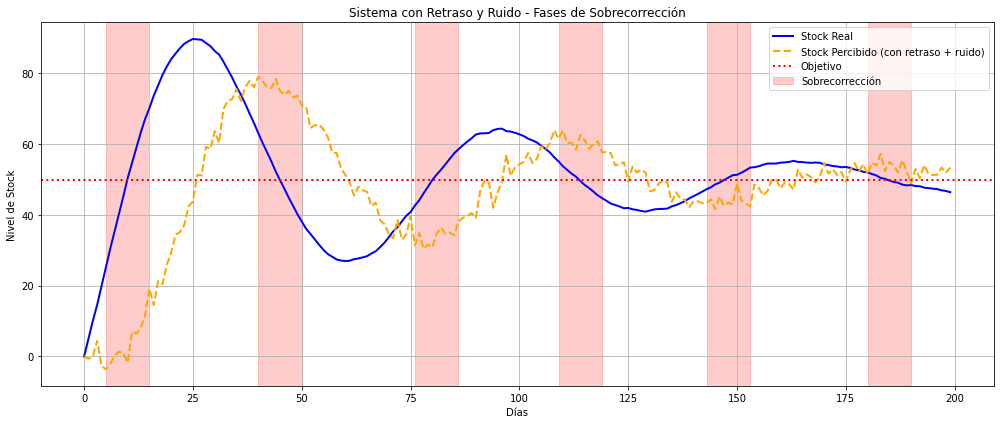

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros 
target_value = 50
delay_days = 15
adjustment_delay = 10
simulation_days = 200
time = np.arange(simulation_days)
noise_std_dev = 2.0  

# Función de retraso de Erlang
def erlang_delay(signal, delay, k=3):
    t = np.arange(0, delay * 4)
    kernel = (t ** (k - 1)) * np.exp(-t / (delay / k))
    kernel /= np.sum(kernel)
    return np.convolve(signal, kernel, mode='full')[:len(signal)]

# Inicialización
real_stock = np.zeros(simulation_days)
perceived_stock = np.zeros(simulation_days)
flow = np.zeros(simulation_days)
real_stock[0] = 0

# Simulación con ruido en la percepción
for day in range(1, simulation_days):
    delayed_signal = erlang_delay(real_stock[:day], delay_days)
    noise = np.random.normal(loc=0, scale=noise_std_dev)
    perceived_stock[day] = (delayed_signal[-1] if len(delayed_signal) > 0 else real_stock[day - 1]) + noise
    
    flow[day] = (target_value - perceived_stock[day]) / adjustment_delay
    real_stock[day] = real_stock[day - 1] + flow[day]

# Detección de sobrecorrecciones 
error = real_stock - target_value
overcorrection_periods = []

for i in range(1, len(error)):
    if np.sign(error[i]) != np.sign(error[i - 1]) and abs(error[i - 1]) > 0.1:
        start = max(0, i - 5)
        end = min(len(error), i + 5)
        overcorrection_periods.append((start, end))

plt.figure(figsize=(14, 6))
plt.plot(time, real_stock, label='Stock Real', linewidth=2, color='blue')
plt.plot(time, perceived_stock, label='Stock Percibido (con retraso y ruido)', linestyle='--', linewidth=2, color='orange')
plt.axhline(y=target_value, color='red', linestyle=':', linewidth=2, label='Objetivo')

for i, (start, end) in enumerate(overcorrection_periods):
    plt.axvspan(start, end, color='red', alpha=0.2, label='Sobrecorrección' if i == 0 else "")

plt.title("Sistema con Retraso y Ruido - Fases de Sobrecorrección")
plt.xlabel("Días")
plt.ylabel("Nivel de Stock")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


El gráfico muestra cómo un sistema de control ajusta un stock hacia un objetivo de 50 unidades, usando una percepción con retraso y ruido. La línea azul representa el stock real, mientras que la línea naranja muestra la percepción atrasada y afectada por ruido. Al inicio, el sistema sobrepasa el objetivo debido al retraso, y luego cambia de dirección bruscamente, lo que genera fases de sobrecorrección (áreas rojas sombreadas).

El ruido en la percepción provoca que el sistema reaccione incluso cuando no es necesario, generando más oscilaciones. Esto impide que el stock se estabilice fácilmente alrededor del objetivo. En conjunto, el gráfico demuestra que los retrasos y la información imprecisa hacen que el sistema pierda estabilidad y ajuste de forma exagerada.

### **Prompt utilizado**
Necesito un código base para simula un sistema de stock que se ajusta a un objetivo utilizando un retraso de percepción tipo Erlang utilizanod Python. Los parámetros deben ser ajustables. No necesito explicaciones, solo una estructura que pueda ir ajustando.

### **Por qué funcionó este prompt**
Este prompt es corto pero claro. Especifica lo esencial, es decir, qué tipo de sistema se desea (uno con retroalimentación hacia un objetivo), qué tipo de retraso se quiere usar (Erlang), el lenguaje de programación (Python) y que sus parámetros sean ajusables. Aunque no entra en detalles técnicos, permite generar un código base funcional que fue adaptado según las necesidades del ejercicio.

### **Análisis de la solución**
La solución generada permitió modelar correctamente un sistema de control con percepción retrasada, donde un stock real se ajusta diariamente en función de una percepción atrasada del sistema. El uso de una convolución con un kernel de Erlang proporciona una forma realista de representar el retraso distribuido en el tiempo. La gráfica generada permitió observar las oscilaciones del sistema en torno al objetivo.

Este código sirvió como punto de partida para agregar otros factores que no estaban incluidos en el prompt original, como:

- Ruido aleatorio en la percepción para analizar la estabilidad del sistema bajo cierto grado de incertidumbre.

- Sombreado de las fases de sobrecorrección, detectadas cuando el error cambia de signo y es suficientemente grande, lo cual permite visualizar claramente los momentos donde el sistema reacciona con demasiada fuerza debido al retraso y/o ruido.

### **Referencias**

1. El impacto de la retroalimentacion retrasada en la dinamica del oscilador Klingeros - FasterCapital. (s. f.). FasterCapital. https://fastercapital.com/es/contenido/El-impacto-de-la-retroalimentacion-retrasada-en-la-dinamica-del-oscilador-Klingeros.html#Tipos-de-retroalimentaci-n-en-Klingeroscillator-Dynamics

2. System Dynamics Society. (2022, 24 octubre). What is System Dynamics | System Dynamics Society. https://systemdynamics.org/what-is-system-dynamics/

